In [85]:
import numpy as np 
import pandas as pd

In [86]:
data=pd.read_csv('bengaluru_house_prices.csv')
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [87]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [88]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

## DATA CLEANING

In [89]:
data=data.drop(['area_type','availability','balcony','society'],axis=1)
data

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [90]:
data.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [91]:
data=data.dropna()

In [92]:
data.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [93]:
data.shape

(13246, 5)

In [94]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

#### Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [95]:
data['BHK']=data['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\KIIT\AppData\Local\Temp\ipykernel_25632\3168625377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BHK']=data['size'].apply(lambda x: int(x.split(' ')[0]))


In [96]:
data.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [97]:
data['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [98]:
data[data.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [99]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [100]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [101]:
data[~data['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


##### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [102]:
def convert_sqft_tonum(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [103]:
data=data.copy()
data['total_sqft']=data['total_sqft'].apply(convert_sqft_tonum)

In [104]:
data.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


##### For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850

In [105]:
data.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

#### Add new feature called price per square feet

In [106]:
data1=data.copy()
data1['price_per_sqft']=data1['price']*1000000/data1['total_sqft']
data1.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000


In [107]:
len(data1.location.unique())

1304

In [108]:
data1.location=data1.location.apply(lambda x: x.strip())
location_stats=data1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [109]:
len(location_stats[location_stats<=10])

1052

In [110]:
locationlessthan10=location_stats[location_stats<=10]
locationlessthan10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [111]:
len(data1.location.unique())

1293

In [112]:
data1.location=data1.location.apply(lambda x: 'other' if x in locationlessthan10 else x)
len(data1.location.unique())

242

In [113]:
data1.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,32478.632479
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,74670.571010
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,181818.181818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,48282.442748
9,other,6 Bedroom,1020.0,6.0,370.00,6,362745.098039


In [114]:
data1[data1.total_sqft/data1.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,362745.098039
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,333333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,106609.808102
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,62962.962963
70,other,3 Bedroom,500.0,3.0,100.0,3,200000.000000


In [115]:
data2=data1[~(data1.total_sqft/data1.BHK<300)]
data2.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,32478.632479
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,74670.571010
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,181818.181818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,48282.442748
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,38888.888889


In [116]:
data2.shape

(12502, 7)

## Outlier Removal Using Standard Deviation and Median

In [117]:
data2["price_per_sqft"].describe().apply(lambda x:format(x,'f'))

count      12456.000000
mean       63085.028260
std        41681.273385
min         2678.298133
25%        42105.263158
50%        52941.176471
75%        69166.666667
max      1764705.882353
Name: price_per_sqft, dtype: object

In [118]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        median_price_per_sqft = np.median(subdf.price_per_sqft)
        median_absolute_deviation = np.median(np.abs(subdf.price_per_sqft - median_price_per_sqft))
        threshold = 1.5 * median_absolute_deviation  

        lower_bound = median_price_per_sqft - threshold
        upper_bound = median_price_per_sqft + threshold

        reduced_df = subdf[(subdf.price_per_sqft >= lower_bound) & (subdf.price_per_sqft <= upper_bound)]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

data3 = remove_pps_outliers(data2)
print(data3.shape)

(5433, 7)


##### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

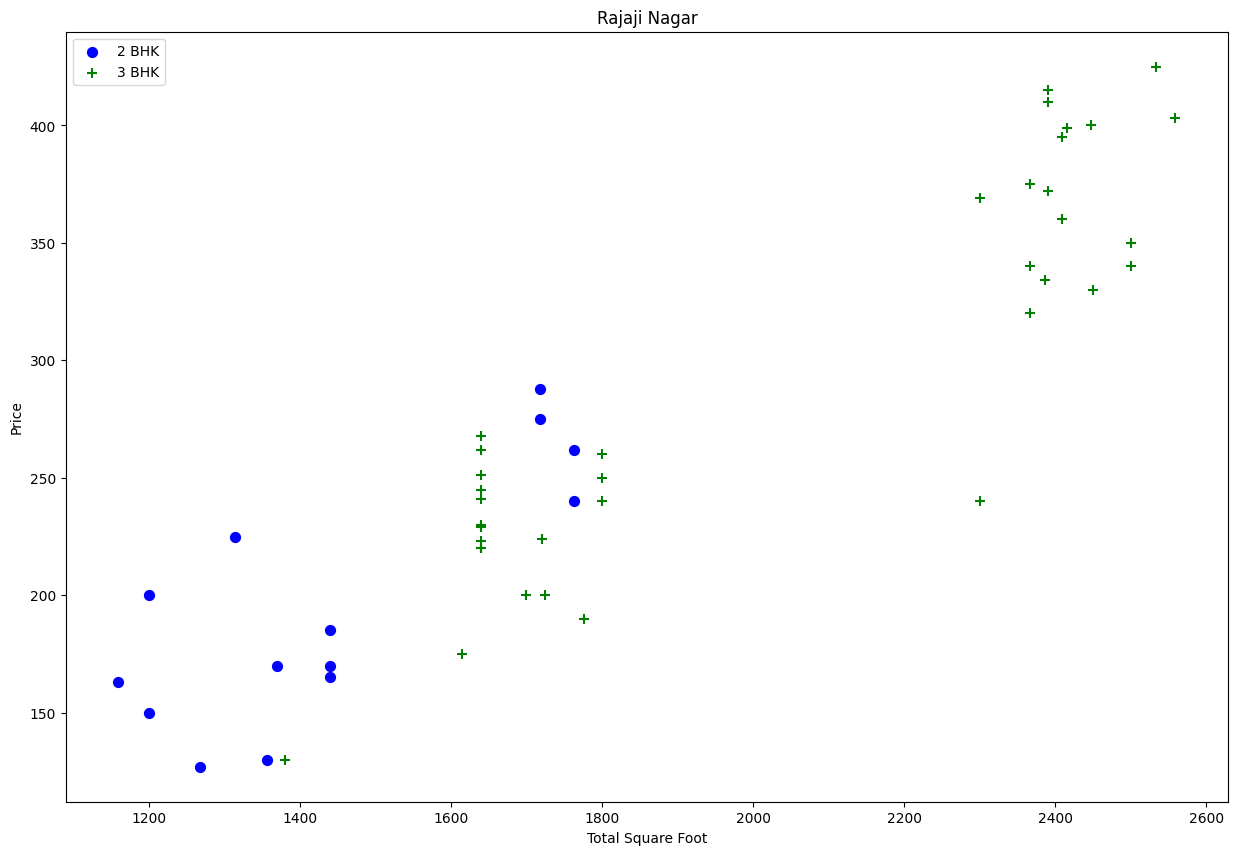

In [119]:
import matplotlib.pyplot as plt
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='Blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3 BHK',s=50)
    plt.xlabel('Total Square Foot')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
plot_scatter_chart(data3,"Rajaji Nagar")

In [120]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for BHK, BHK_df in location_df.groupby('BHK'):
            median_price_per_sqft = np.median(BHK_df.price_per_sqft)
            median_absolute_deviation = np.median(np.abs(BHK_df.price_per_sqft - median_price_per_sqft))
            threshold = 1.5 * median_absolute_deviation  
            
            bhk_stats[BHK] = {
                'median': median_price_per_sqft,
                'mad': median_absolute_deviation,
                'count': BHK_df.shape[0]
            }
        
        for BHK, BHK_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(BHK - 1)
            if stats and stats['count'] > 5:
                lower_bound = stats['median'] - 1.5 * stats['mad']
                exclude_indices = np.append(exclude_indices, BHK_df[BHK_df.price_per_sqft < lower_bound].index.values)
    return df.drop(exclude_indices, axis='index')

data4 = remove_bhk_outliers(data3)
print(data4.shape)

(4993, 7)


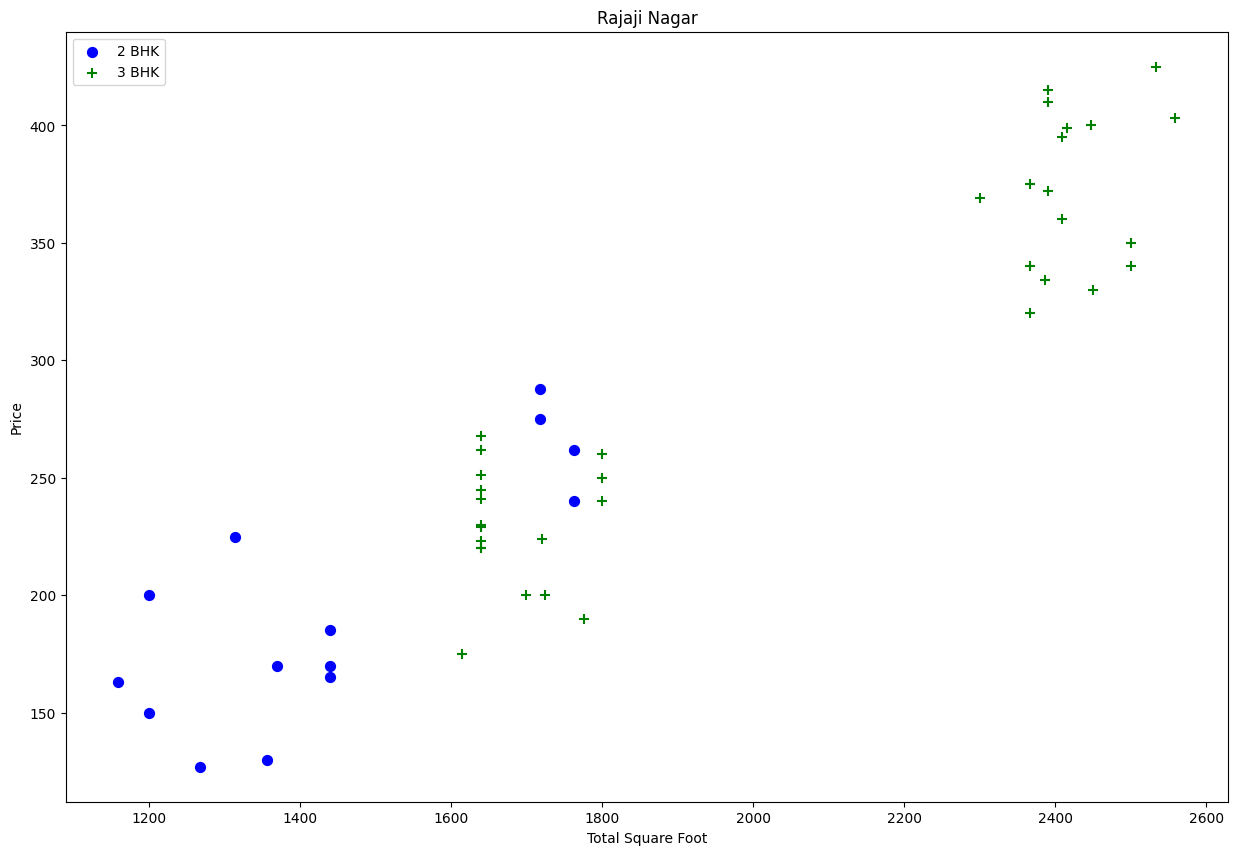

In [121]:
plot_scatter_chart(data4,"Rajaji Nagar")

Text(0, 0.5, 'Count')

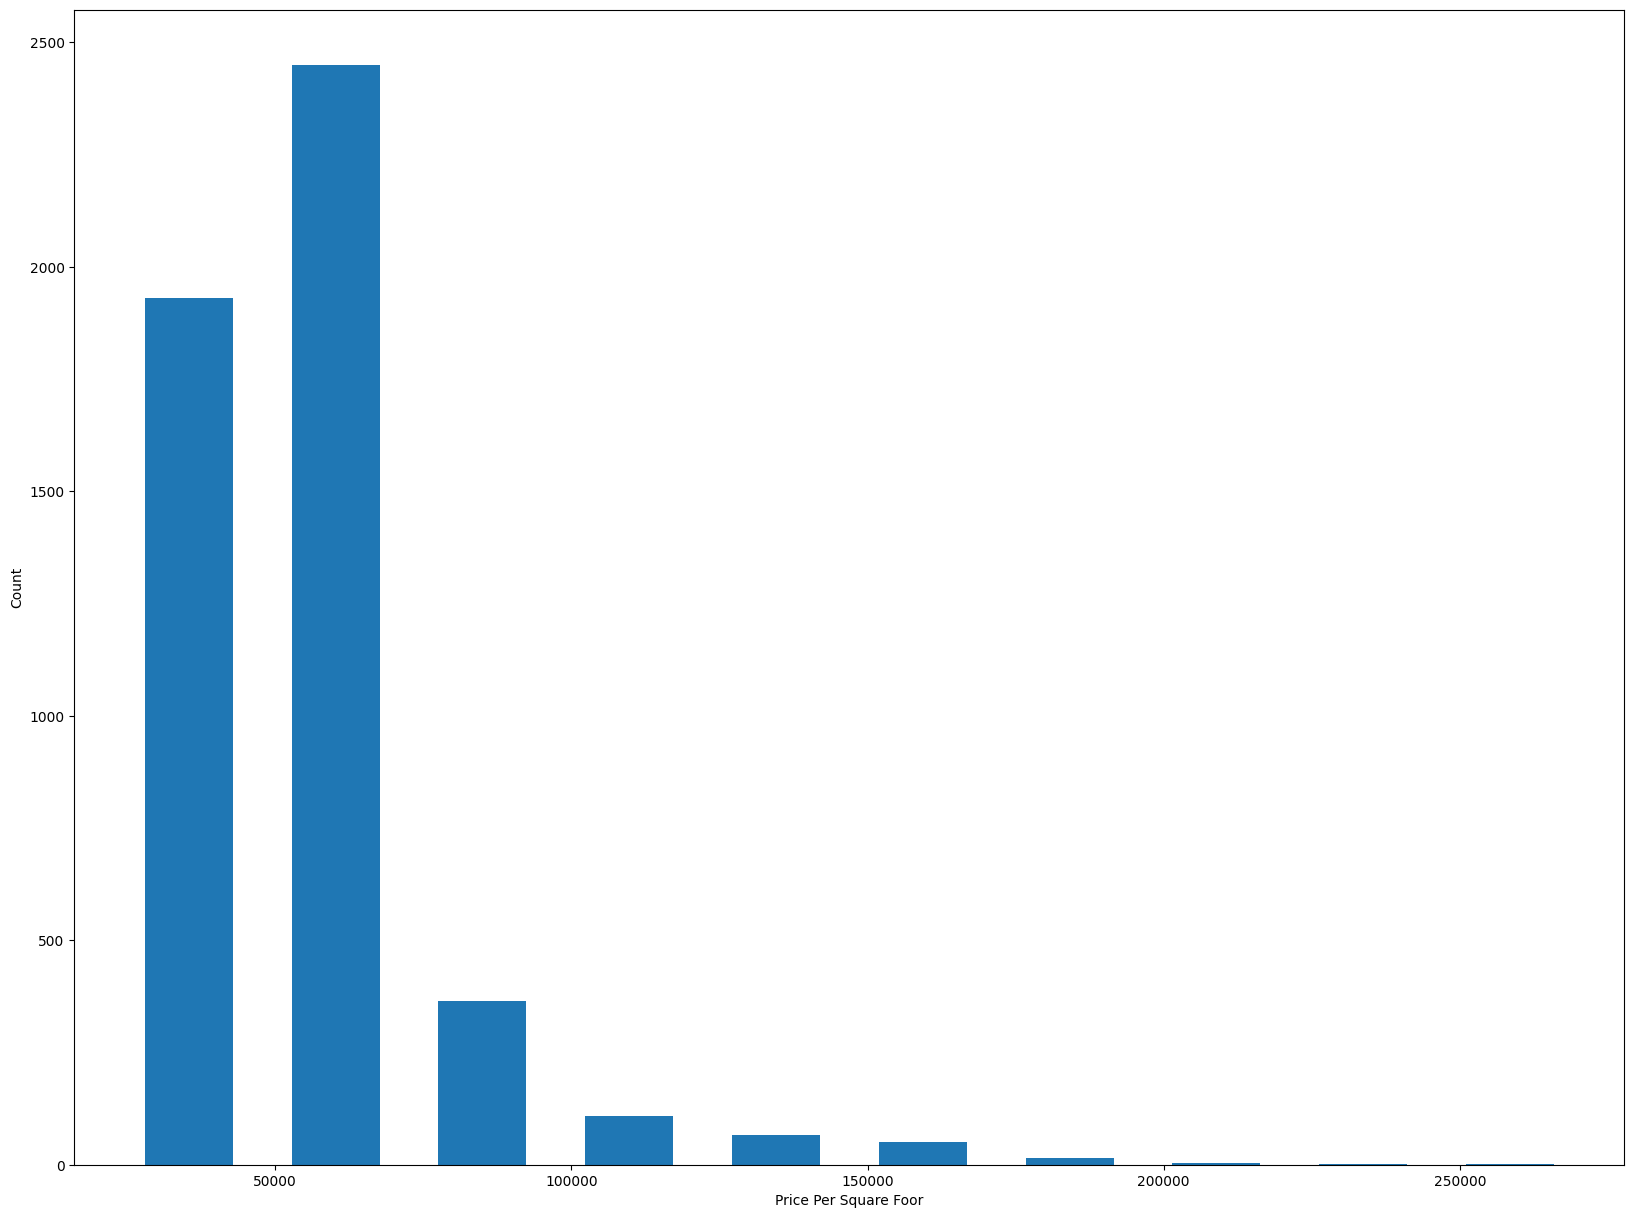

In [122]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(data4.price_per_sqft,rwidth=0.6)
plt.xlabel("Price Per Square Foor")
plt.ylabel("Count")

#### Outlier Removal Using Bathrooms Feature

In [123]:
data4.bath.unique()

array([ 4.,  3.,  2.,  8.,  5.,  1.,  6.,  7.,  9., 12.])

In [124]:
data4[data4.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
3798,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,40000.0


Text(0, 0.5, 'Count')

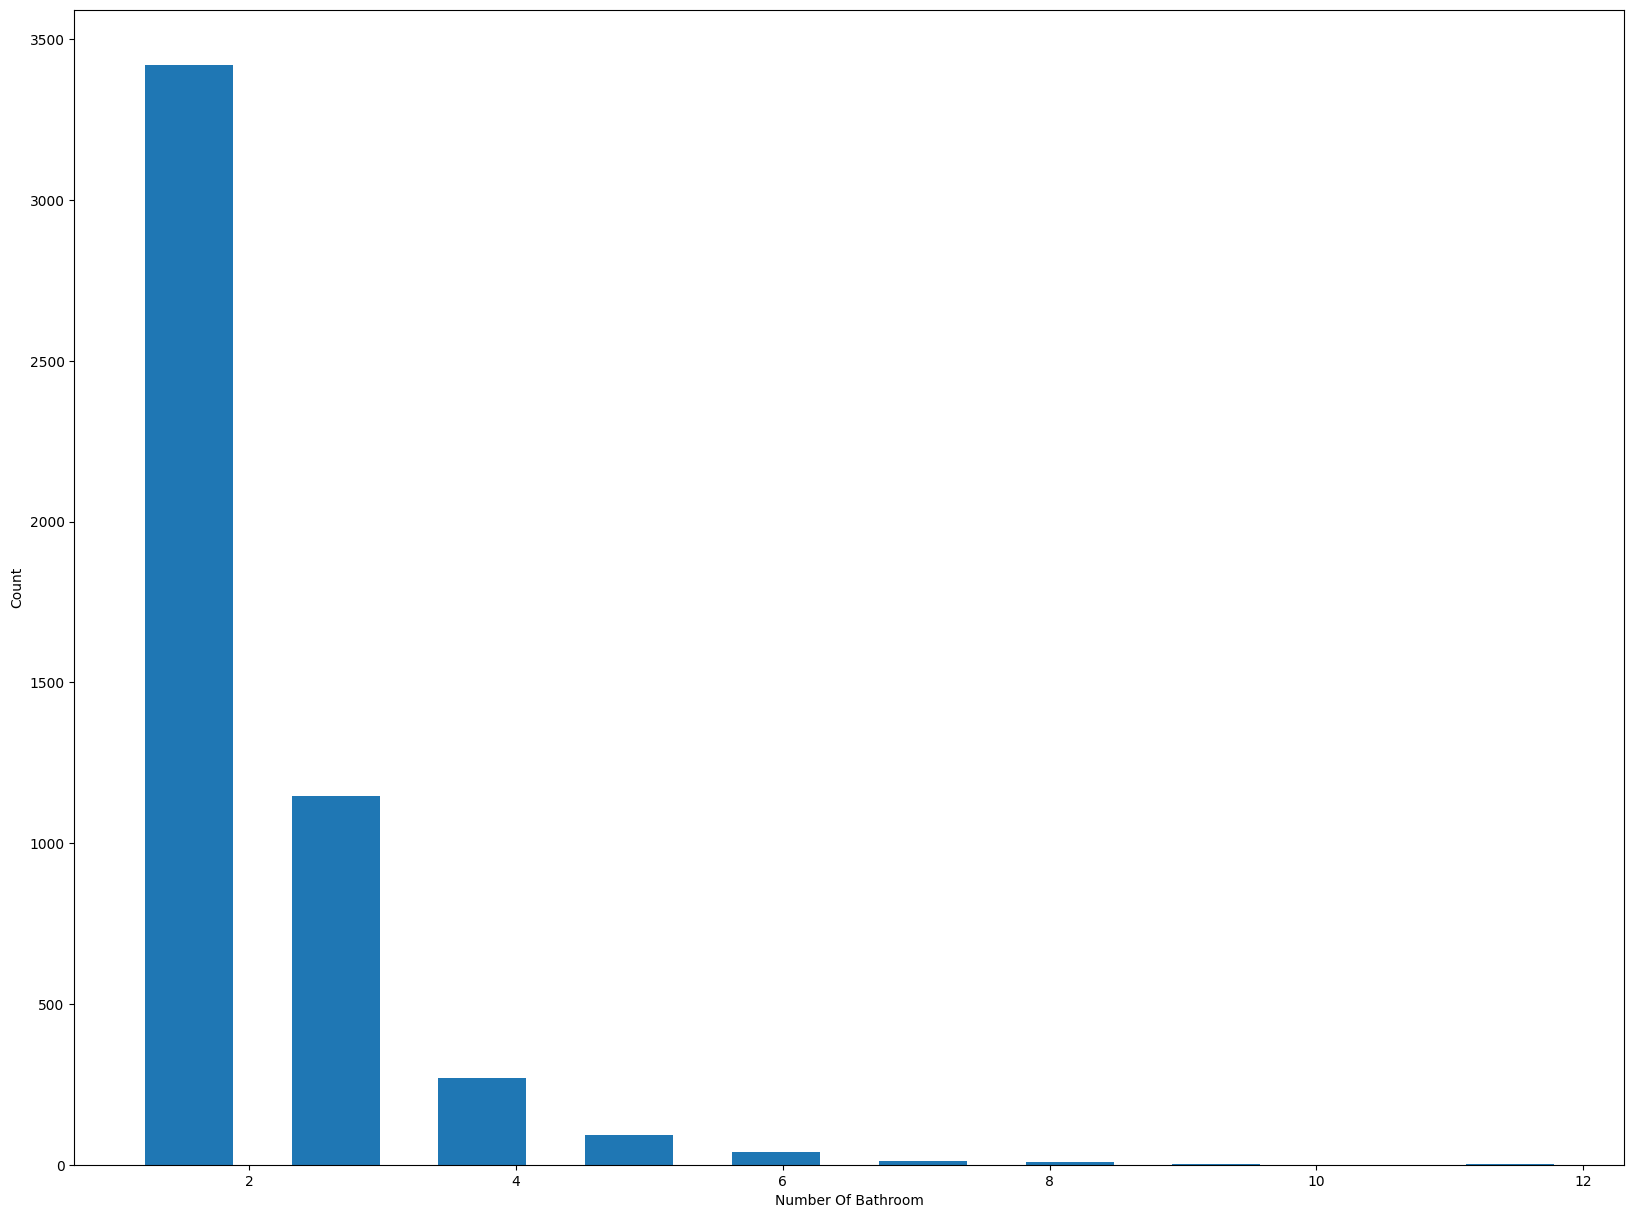

In [125]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(data4.bath,rwidth=0.6)
plt.xlabel("Number Of Bathroom")
plt.ylabel("Count")

In [126]:
data4[data4.bath>data4.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1053,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,32520.325203
3757,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,64285.714286


In [127]:
data5=data4[data4.bath<data4.BHK+2]
data5.shape

(4947, 7)

In [128]:
data6=data5.drop(['size','price_per_sqft'],axis='columns')
data6

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.00,4
1,1st Block Jayanagar,1630.0,3.0,194.00,3
2,1st Block Jayanagar,1875.0,2.0,235.00,3
3,1st Block Jayanagar,1200.0,2.0,130.00,3
4,1st Block Jayanagar,1235.0,2.0,148.00,2
...,...,...,...,...,...
5428,Yeshwanthpur,2500.0,3.0,138.00,3
5429,Yeshwanthpur,1160.0,2.0,64.08,2
5430,Yeshwanthpur,1676.0,3.0,92.13,3
5431,Yeshwanthpur,2503.0,3.0,138.00,3


## Use One Hot Encoding For Location

In [129]:
dummies=pd.get_dummies(data6.location)
dummies = dummies * 1
dummies.head(10)

,1st Block Jayanagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Yelachenahalli,Yelahanka,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
data7=pd.concat([data6,dummies],axis='columns')
data7

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Yelachenahalli,Yelahanka,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.00,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.00,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.00,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,Yeshwanthpur,2500.0,3.0,138.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5429,Yeshwanthpur,1160.0,2.0,64.08,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5430,Yeshwanthpur,1676.0,3.0,92.13,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5431,Yeshwanthpur,2503.0,3.0,138.00,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [131]:
data8=data7.drop('location',axis='columns')
data8.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Yelachenahalli,Yelahanka,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building a Model

In [132]:
data8.shape

(4947, 223)

In [133]:
X=data8.drop('price',axis='columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,8th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Yelachenahalli,Yelahanka,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
y=data8.price

In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [136]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8812600604000438

#### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [137]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.88800961, 0.85273549, 0.89235454, 0.86811714, 0.91347016])

##### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

In [138]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import pandas as pd

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# Example usage:
# Assuming you have X and y defined elsewhere
find_best_model_using_gridsearchcv(X, y)


C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", l

,model,best_score,best_params
0,linear_regression,0.882937,{}
1,lasso,0.684708,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.865289,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


#### Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

## Test the model for few properties

In [139]:
def price_predict(location,sqft,bath,BHK):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=BHK
    if loc_index >=0:
        x[loc_index]=1
    return model.predict([x])[0]

In [140]:
price_predict('1st Block Jayanagar',1000,2,2)

C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


214.93441104888916

In [141]:
price_predict('1st Block Jayanagar',1000,2,3)

C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


206.40034675598145

In [142]:
price_predict('5th Phase JP Nagar',1000,2,2)

C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


38.8358793258667

In [143]:
price_predict('Indira Nagar',1000,2,2)

C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


131.26736164093018